In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [2]:
# print the current working directory
print(os.getcwd())

/Users/raz/atlarge/opendc/demo/output/hyperscale-xeon


In [3]:
def process_host_data(path):
    host = pd.read_parquet(path)
    host = host.select_dtypes(include=[np.number]).groupby("timestamp").aggregate("sum")
    host = host["energy_usage"].sum() #value in Ws
    host = host / 3600 #value in Wh
    host = host / 1e6 #value in MWh
    
    return host

In [4]:
host_1 = process_host_data("raw-output/0/seed=0/host.parquet")
host_2 = process_host_data("raw-output/1/seed=0/host.parquet")
host_3 = process_host_data("raw-output/2/seed=0/host.parquet")
host_4 = process_host_data("raw-output/3/seed=0/host.parquet")

Model 1 predicts  543.188000353038 MWh
Model 2 predicts  542.0170845243732 MWh
Model 3 predicts  541.6985370817777 MWh
Model 4 predicts  541.6413075082716 MWh


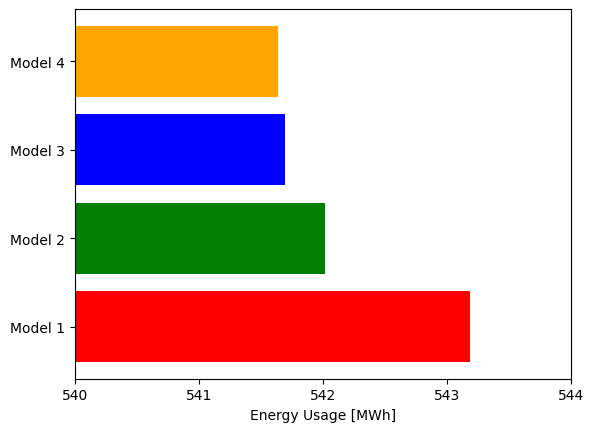

In [24]:
# plot, in a bar char, the eergy usage of the host
# horizontal barchart, with different colors, and the axis being between 535 and 545
fig, ax = plt.subplots()
ax.barh(["Model 1", "Model 2", "Model 3", "Model 4"], [host_1, host_2, host_3, host_4], color=["red", "green", "blue", "orange"])
ax.set_xlim(540, 544)
# ax.y_label("Model")
# ax.x_label("Energy Usage (MWh)")

# set x_label
plt.xlabel("Energy Usage [MWh]")

# ticks of y will be 540, 541, 542, 543, 544
plt.xticks([540, 541, 542, 543, 544])

# save as pdf
plt.savefig("energy_usage_multi_model.pdf")



print("Model 1 predicts ", host_1, "MWh")
print("Model 2 predicts ", host_2, "MWh")
print("Model 3 predicts ", host_3, "MWh")
print("Model 4 predicts ", host_4, "MWh")